<a href="https://colab.research.google.com/github/Nadunnissanka/Day-71-Analysis-of-Post-University-Salaries-of-Graduates-by-Major/blob/main/Analysis_of_Post_University_Salaries_of_Graduates_by_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis of Post-University Salaries of Graduates by Major**. 
College degrees are very expensive. But, do they pay you back? Choosing Philosophy or International Relations as a major may have worried your parents, but does the data back up their fears? PayScale Inc. did a year-long survey of 1.2 million Americans with only a bachelor's degree. We'll be digging into this data and use Pandas to answer these questions:


1.   Which degrees have the highest starting salaries? 
2.   Which majors have the lowest earnings after college?
3.   Which degrees have the highest earning potential?
4.   What are the lowest risk college majors from an earnings standpoint?
5.   Do business, STEM (Science, Technology, Engineering, Mathematics) or HASS (Humanities, Arts, Social Science) degrees earn more on average?



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/datasets/salaries_by_college_major.csv")

In [3]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


## **Preliminary Data Exploration and Data Cleaning with Pandas**. 
Now that we've got our data loaded into our dataframe, we need to take a closer look at it to help us understand what it is we are working with. This is always the first step with any data science project. Let's see if we can answer the following questions: 
  



1.    How many rows does our dataframe have? 

2.    How many columns does it have?

3.    What are the labels for the columns? Do the columns have names?

4.    Are there any missing values in our dataframe? Does our dataframe contain any bad data?

We've already used the **.head()** method to peek at the top 5 rows of our dataframe. To see the number of rows and columns we can use the **shape** attribute.

In [4]:
df.shape

(51, 6)

(51, 6) --> 51 Rows & 6 Colums

We saw that each column had a name. We can access the column names directly with the **columns** attribute.

In [5]:
df.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 90th Percentile Salary', 'Group'],
      dtype='object')

### **Missing Values and Junk Data**


Before we can proceed with our analysis we should try and figure out if there are any missing or junk data in our dataframe. That way we can avoid problems later on. In this case, we're going to look for NaN (Not A Number) values in our dataframe. NAN values are blank cells or cells that contain strings instead of numbers. Use the .isna() method and see if you can spot if there's a problem somewhere.

```df.isna()```   
Did you find anything? Check the last couple of rows in the dataframe:

```df.tail()```  
Aha! We have a row that contains some information regarding the source of the data with blank values for all the other other columns.

In [6]:
df.isna()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [7]:
df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS
50,Source: PayScale Inc.,NaN,NaN,NaN,NaN,NaN


We dont need this last row (50 - Source: PayScale Inc.)  	
  
### **Delete the Last Row**

We don't want this row in our dataframe. There's two ways you can go about removing this row. The first way is to manually remove the row at index 50. The second way is to simply use the .dropna() method from pandas. Let's create a new dataframe without the last row and examine the last 5 rows to make sure we removed the last row:

```clean_df = df.dropna()```   
```clean_df.tail()```


In [8]:
clean_df = df.dropna() # this will drop the rows that have NaN's and clean the data. after that this will create a new dataframe name 'clean_df'

In [9]:
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,40800.0,78200.0,41200.0,168000.0,HASS
46,Psychology,35900.0,60400.0,31600.0,127000.0,HASS
47,Religion,34100.0,52000.0,29700.0,96400.0,HASS
48,Sociology,36500.0,58200.0,30700.0,118000.0,HASS
49,Spanish,34000.0,53100.0,31000.0,96400.0,HASS


* As you can see the line 50 is not there.

In [10]:
clean_df.isna()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


* There are no remaining NaN's in 'clean_df' dataframe.

## **Accessing Columns and Individual Cells in a Dataframe**.  
Find College Major with Highest Starting Salaries

To access a particular column from a data frame we can use the square bracket notation, like so:
   
```clean_df['Starting Median Salary']```
  
You should see all the values printed out below the cell for just this column

In [11]:
clean_df['Starting Median Salary']

0     46000.0
1     57700.0
2     42600.0
3     36800.0
4     41600.0
5     35800.0
6     38800.0
7     43000.0
8     63200.0
9     42600.0
10    53900.0
11    38100.0
12    61400.0
13    55900.0
14    53700.0
15    35000.0
16    35900.0
17    50100.0
18    34900.0
19    60900.0
20    38000.0
21    37900.0
22    47900.0
23    39100.0
24    41200.0
25    43500.0
26    35700.0
27    38800.0
28    39200.0
29    37800.0
30    57700.0
31    49100.0
32    36100.0
33    40900.0
34    35600.0
35    49200.0
36    40800.0
37    45400.0
38    57900.0
39    35900.0
40    54200.0
41    39900.0
42    39900.0
43    74300.0
44    50300.0
45    40800.0
46    35900.0
47    34100.0
48    36500.0
49    34000.0
Name: Starting Median Salary, dtype: float64

To find the highest starting salary we can simply chain the **.max()** method.

```clean_df['Starting Median Salary'].max()```     
    
The highest starting salary is $74,300. But which college major earns this much on average? For this, we need to know the row number or index so that we can look up the name of the major. Lucky for us, **the .idxmax() method will give us index for the row with the largest value**.

```clean_df['Starting Median Salary'].idxmax()```
    
which is 43. To see the name of the major that corresponds to that particular row, we can **use the .loc (location) property**.

```clean_df['Undergraduate Major'].loc[43]```   
  
Here we are selecting both a column ('Undergraduate Major') and a row at index 43, so we are retrieving the value of a particular cell. You might see people using the **double square brackets notation** to achieve exactly the same thing: 

```clean_df['Undergraduate Major'][43]```  
    
If you don't specify a particular column you can use the **.loc** property to retrieve an **entire row**:

```clean_df.loc[43]```

**Question 1.1:** What college major has the highest mid-career salary?

In [12]:
highest_mid_career_median_Salary_index = clean_df['Mid-Career Median Salary'].idxmax()
major_that_has_highest_mid_career_median_Salary = clean_df['Undergraduate Major'][highest_mid_career_median_Salary_index]
print(major_that_has_highest_mid_career_median_Salary)

Chemical Engineering


**Question 1.2:** How much do graduates with this major earn? (Mid-career is defined as having 10+ years of experience).

In [13]:
chemical_engineer_row = clean_df[clean_df['Undergraduate Major'] == major_that_has_highest_mid_career_median_Salary]
chemical_engineer_mid_salary = chemical_engineer_row['Mid-Career Median Salary']
print(f"Chemical Enginner Mid Salary: {chemical_engineer_mid_salary}")

Chemical Enginner Mid Salary: 8    107000.0
Name: Mid-Career Median Salary, dtype: float64


**Question 2:** Which college major has the lowest starting salary and how much do graduates earn after university?

In [14]:
lowest_starting_salary_index = clean_df['Starting Median Salary'].idxmin()
lowest_starting_salary_major = clean_df['Undergraduate Major'][lowest_starting_salary_index]
print(f"Major that has the lowest starting salary: {lowest_starting_salary_major}\n")
print(f"Gradutes earn salary of {clean_df['Starting Median Salary'].min()} after leaving university")

Major that has the lowest starting salary: Spanish

Gradutes earn salary of 34000.0 after leaving university


**Question 3:** Which college major has the lowest mid-career salary and how much can people expect to earn with this degree? 

In [15]:
lowest_mid_salary_index = clean_df['Mid-Career Median Salary'].idxmin()
lowest_mid_salary_major = clean_df['Undergraduate Major'][lowest_mid_salary_index]
print(f"Major that has the lowest starting salary: {lowest_mid_salary_major}\n")
print(f"people earn salary of {clean_df['Mid-Career Median Salary'].min()} after 10 years")

Major that has the lowest starting salary: Education

people earn salary of 52000.0 after 10 years


## **Sorting Values & Adding Columns: Majors with the Most Potential vs Lowest Risk**  
### **Lowest Risk Majors**

A low-risk major is a degree where there is a small difference between the lowest and highest salaries. In other words, if the difference between the 10th percentile and the 90th percentile earnings of your major is small, then you can be more certain about your salary after you graduate.

How would we calculate the difference between the earnings of the 10th and 90th percentile? Well, Pandas allows us to do simple arithmetic with entire columns, so all we need to do is take the difference between the two columns:

```clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']```

Alternatively, you can also use the **.subtract()** method.

```clean_df['Mid-Career 90th Percentile Salary'].subtract(clean_df['Mid-Career 10th Percentile Salary'])```   

**Step 01**: Find difference between 10th and 90th percentile earnings to calculate the salary after a person graduate.

In [22]:
salary_spread_column = clean_df['Mid-Career 90th Percentile Salary'].subtract(clean_df['Mid-Career 10th Percentile Salary'])
#print(salary_spread_column)

The output of this computation will be another Pandas dataframe column. We can add this to our existing dataframe with the **.insert()** method:



In [23]:
clean_df.insert(1, 'Spread', salary_spread_column)
clean_df.head()

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,109800.0,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,96700.0,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,113700.0,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,104200.0,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,85400.0,41600.0,76800.0,50600.0,136000.0,Business


The first argument is the position of where the column should be inserted. In our case, it's at position 1, so the second column.

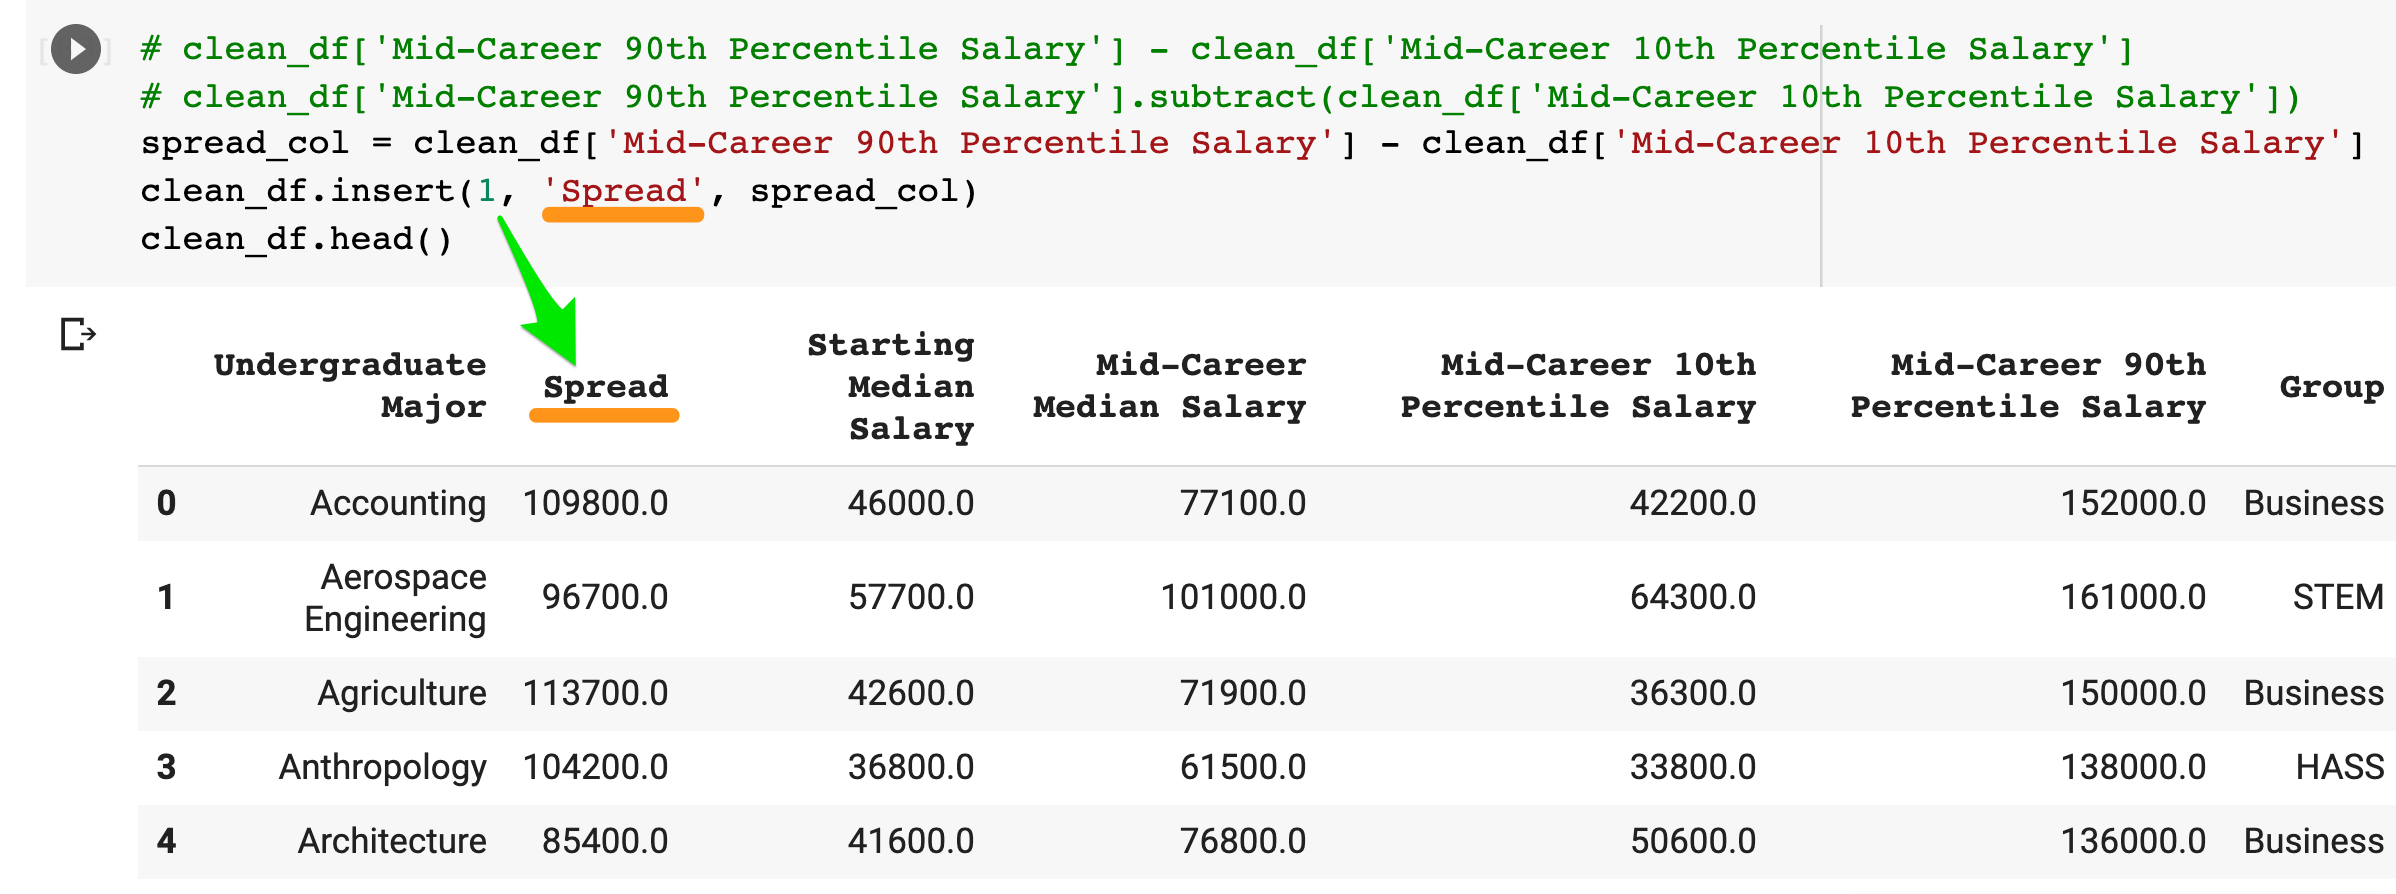

## **Sorting by the Lowest Spread**

To see which degrees have the smallest spread, we can use the **.sort_values()** method. And since we are interested in only seeing the name of the degree and the major, we can pass a list of these two column names to look at the **.head()** of these two columns exclusively.

In [24]:
low_risk = clean_df.sort_values('Spread')
low_risk[['Undergraduate Major', 'Spread']].head()

,Undergraduate Major,Spread
40,Nursing,50700.0
43,Physician Assistant,57600.0
41,Nutrition,65300.0
49,Spanish,65400.0
27,Health Care Administration,66400.0


Does **.sort_values()** sort in ascending or descending order? To find out, check out the Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

You can also bring up the quick documentation with shift + tab on your keyboard directly in the Python notebook.

**Question 4.** Using the **.sort_values()** method, can you find the degrees with the highest potential? Find the top 5 degrees with the highest values in the 90th percentile. 

In [27]:
high_potential_majors = clean_df.sort_values('Mid-Career 90th Percentile Salary', ascending=False)
high_potential_majors[['Undergraduate Major', 'Mid-Career 90th Percentile Salary']].head()

,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,210000.0
22,Finance,195000.0
8,Chemical Engineering,194000.0
37,Math,183000.0
44,Physics,178000.0


**Question 5.** Find the degrees with the greatest spread in salaries. Which majors have the largest difference between high and low earners after graduation.

In [28]:
greatest_spread = clean_df.sort_values('Spread', ascending=False)
greatest_spread[['Undergraduate Major', 'Spread']].head()

,Undergraduate Major,Spread
17,Economics,159400.0
22,Finance,147800.0
37,Math,137800.0
36,Marketing,132900.0
42,Philosophy,132500.0


## **Grouping and Pivoting Data with Pandas**
Often times you will want to sum rows that below to a particular category. For example, which category of degrees has the highest average salary? Is it **STEM**, Business or **HASS** (Humanities, Arts, and Social Science)? 

To answer this question we need to learn to use the .groupby() method. This allows us to manipulate data similar to a Microsoft Excel Pivot Table.

We have **three categories in the 'Group' column: STEM, HASS and Business**. Let's count how many majors we have in each category:

```clean_df.groupby('Group').count()```



In [29]:
clean_df.groupby('Group').count()

,Undergraduate Major,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,,
Business,12,12,12,12,12,12
HASS,22,22,22,22,22,22
STEM,16,16,16,16,16,16


### **Mini Challenge**

Now can you use the **.mean()** method to find the average salary by group? 

In [30]:
clean_df.groupby('Group').mean()

,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,103958.333333,44633.333333,75083.333333,43566.666667,147525.000000
HASS,95218.181818,37186.363636,62968.181818,34145.454545,129363.636364
STEM,101600.000000,53862.500000,90812.500000,56025.000000,157625.000000


### **Number formats in the Output**

The above is a little hard to read, isn't it? We can tell Pandas to print the numbers in our notebook to look like 1,012.45 with the following line:

```pd.options.display.float_format = '{:,.2f}'.format ```

In [32]:
pd.options.display.float_format = '{:,.2f}'.format
clean_df.groupby('Group').mean()

,Spread,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary
Group,,,,,
Business,"103,958.33","44,633.33","75,083.33","43,566.67","147,525.00"
HASS,"95,218.18","37,186.36","62,968.18","34,145.45","129,363.64"
STEM,"101,600.00","53,862.50","90,812.50","56,025.00","157,625.00"


## **Learning Points & Summary Today's Learning Points**



1.    **Use .head(), .tail(), .shape and .columns** to explore your DataFrame and find out the number of rows and columns as well as the column names.

2.    Look for NaN (not a number) values with **.findna() and consider using .dropna() to clean up your DataFrame.**

3.    You can access entire columns of a DataFrame using the square bracket notation: 

     ```df['column name'] or df[['column name 1', 'column name 2', 'column name 3']]```

4.    You can access individual cells in a DataFrame by chaining square brackets, 

    ```df['column name'][index] or using df['column name'].loc[index]```

5.    The largest and smallest values, as well as their positions, can be found with methods like **.max(), .min(), .idxmax() and .idxmin()**

6.    You can sort the DataFrame with **.sort_values()** and add new columns with .insert()

7.    To create an Excel Style Pivot Table by grouping entries that belong to a particular category use the **.groupby()** method